<a href="https://colab.research.google.com/github/ambujpyne02/Ambuj/blob/main/F1_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import pickle
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
plt.style.use('seaborn')

<ipython-input-113-887edc163aa7>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
from google.colab import files
files.upload()

Saving circuits.csv to circuits.csv
Saving constructor_standings.csv to constructor_standings.csv
Saving constructors.csv to constructors.csv
Saving driver_standings.csv to driver_standings.csv
Saving drivers.csv to drivers.csv
Saving qualifying.csv to qualifying.csv
Saving races.csv to races.csv
Saving results.csv to results.csv


{'circuits.csv': b'circuitId,circuitRef,name,location,country,lat,lng,alt,url\n1,"albert_park","Albert Park Grand Prix Circuit","Melbourne","Australia",-37.8497,144.968,10,"http://en.wikipedia.org/wiki/Melbourne_Grand_Prix_Circuit"\n2,"sepang","Sepang International Circuit","Kuala Lumpur","Malaysia",2.76083,101.738,18,"http://en.wikipedia.org/wiki/Sepang_International_Circuit"\n3,"bahrain","Bahrain International Circuit","Sakhir","Bahrain",26.0325,50.5106,7,"http://en.wikipedia.org/wiki/Bahrain_International_Circuit"\n4,"catalunya","Circuit de Barcelona-Catalunya","Montmel\xc3\xb3","Spain",41.57,2.26111,109,"http://en.wikipedia.org/wiki/Circuit_de_Barcelona-Catalunya"\n5,"istanbul","Istanbul Park","Istanbul","Turkey",40.9517,29.405,130,"http://en.wikipedia.org/wiki/Istanbul_Park"\n6,"monaco","Circuit de Monaco","Monte-Carlo","Monaco",43.7347,7.42056,7,"http://en.wikipedia.org/wiki/Circuit_de_Monaco"\n7,"villeneuve","Circuit Gilles Villeneuve","Montreal","Canada",45.5,-73.5228,13,"http:

In [ ]:
results=pd.read_csv('results.csv')
drivers=pd.read_csv('drivers.csv')
constructors=pd.read_csv('constructors.csv')
races=pd.read_csv('races.csv')

In [ ]:
circuits=pd.read_csv('circuits.csv')
driver_standings=pd.read_csv('driver_standings.csv')
constructor_standings=pd.read_csv('constructor_standings.csv')
qualifying=pd.read_csv('qualifying.csv')

In [ ]:
results.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   
4            5              5     4.0    58      +18.014      5708630   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1  
4         43    1       1:27.418         218.385         1

Merging datasets to form a combined dataframe

In [ ]:
df=pd.merge(results,races[['raceId','year','name','round']],on='raceId',how='left')
df=pd.merge(df,drivers[['driverId','driverRef','nationality']],on='driverId',how='left')
df=pd.merge(df,constructors[['constructorId','name','nationality']],on='constructorId',how='left')

In [ ]:
df.head()

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   
4         5      18         5              1     23     3        5   

  positionText  positionOrder  points  ...  fastestLapTime fastestLapSpeed  \
0            1              1    10.0  ...        1:27.452         218.300   
1            2              2     8.0  ...        1:27.739         217.586   
2            3              3     6.0  ...        1:28.090         216.719   
3            4              4     5.0  ...        1:28.603         215.464   
4            5              5     4.0  ...        1:27.418         218.385   

  statusId  year                 name_x round   driverRef  nationality_x  \
0        1  2008  Australian Grand Prix     1    hamilton        British   
1        1  2008  Australian Grand Prix     1    heidfeld         German   
2        1  2008  Australian Grand Prix     1     rosberg         German   
3        1  2008  Australian Grand Prix     1      alonso        Spanish   
4        1  2008  Australian Grand Prix     1  kovalainen        Finnish   

       name_y nationality_y  
0     McLaren       British  
1  BMW Sauber        German  
2    Williams       British  
3     Renault        French  
4     McLaren       British  

[5 rows x 25 columns]

In [ ]:
# Dropping unnecesarry columns not required for visualization
df.drop(['number','position','positionText','laps','fastestLap','statusId','resultId','raceId','driverId','constructorId'],axis=1,inplace=True)

In [ ]:
df.rename(columns={'rank':'fastestLapRank','name_x':'gp_name','nationality_x':'driver_nationality','name_y':'constructor_name','nationality_y':'constructor_nationality','driverRef':'driver'},inplace=True)

In [ ]:
for col in df.columns:
  print(col)

grid
positionOrder
points
time
milliseconds
fastestLapRank
fastestLapTime
fastestLapSpeed
year
gp_name
round
driver
driver_nationality
constructor_name
constructor_nationality


In [ ]:
df=df[['year','gp_name','round','driver','constructor_name','grid','positionOrder','points','time','milliseconds','fastestLapRank','fastestLapTime','fastestLapSpeed','driver_nationality','constructor_nationality']]

In [ ]:
df=df[df['year']!=2023]

In [ ]:
df=df.sort_values(by=['year','round','positionOrder'],ascending=[False,True,True])

In [ ]:
# Replacing \\N values with NULL value in the datasets
df.time.replace('\\N',np.nan,inplace=True)
df.milliseconds.replace('\\N',np.nan,inplace=True)
df.fastestLapRank.replace('\\N',np.nan,inplace=True)
df.fastestLapTime.replace('\\N',np.nan,inplace=True)
df.fastestLapSpeed.replace('\\N',np.nan,inplace=True)

In [ ]:
# Changing the column data type to float
df.fastestLapSpeed=df.fastestLapSpeed.astype(float)
df.fastestLapRank=df.fastestLapRank.astype(float)
df.milliseconds=df.milliseconds.astype(float)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
print(df.shape)

(25840, 15)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   grid                     25840 non-null  int64  
 1   positionOrder            25840 non-null  int64  
 2   points                   25840 non-null  float64
 3   time                     7088 non-null   object 
 4   milliseconds             7087 non-null   float64
 5   fastestLapRank           7591 non-null   float64
 6   fastestLapTime           7379 non-null   object 
 7   fastestLapSpeed          7379 non-null   float64
 8   year                     25840 non-null  int64  
 9   gp_name                  25840 non-null  object 
 10  round                    25840 non-null  int64  
 11  driver                   25840 non-null  object 
 12  driver_nationality       25840 non-null  object 
 13  constructor_name         25840 non-null  object 
 14  constructor_nationalit

In [ ]:
sb.set_palette('Set3')
plt.rcParams['figure.figsize']=10,6

# **Top 10 Driver/ Constructors with most wins**

In [ ]:
#Creating a dataframe containing the name of all the GP Winners until now and how many GP they have won
driver_winner=df.loc[df['positionOrder']==1].groupby('driver')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

([], [])

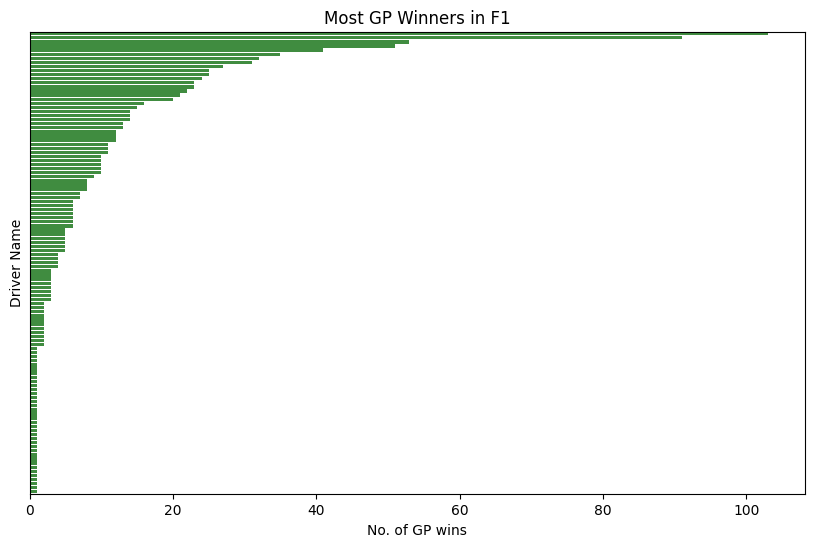

In [ ]:
#Barplot

sb.barplot(data=driver_winner,x='positionOrder',y='driver',color='green',alpha=0.8)
plt.title('Most GP Winners in F1')
plt.ylabel('Driver Name')
plt.xlabel('No. of GP wins')
plt.yticks([])

In [ ]:
#Top 10 drivers with most wins
top10Drivers=driver_winner.head(10)
top10Drivers

driver  positionOrder
0            hamilton            103
1  michael_schumacher             91
2              vettel             53
3               prost             51
4               senna             41
5      max_verstappen             35
6              alonso             32
7             mansell             31
8             stewart             27
9               clark             25

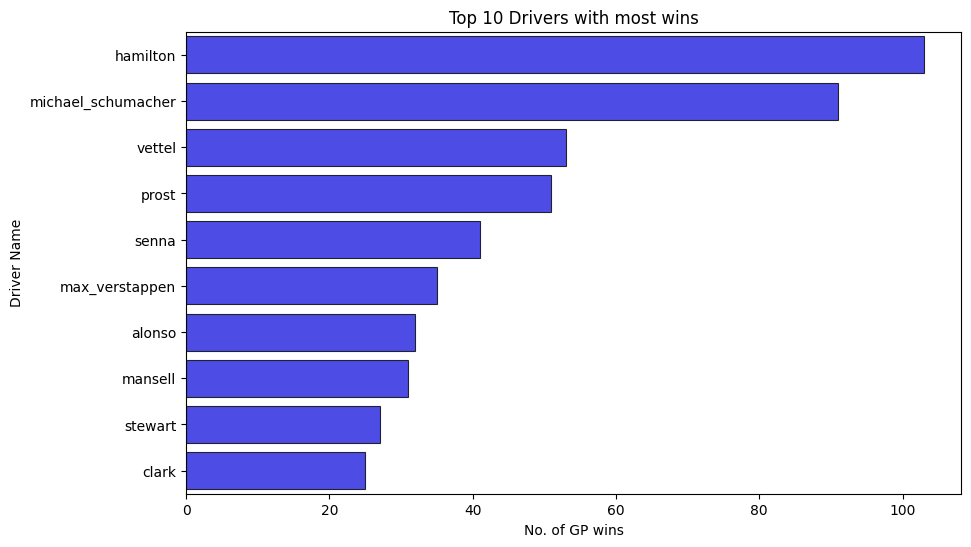

In [ ]:
#Barplot Top 10 Drivers with most Wins
sb.barplot(data=top10Drivers, y='driver',x='positionOrder', color='blue', alpha=0.8, linewidth=.8, edgecolor='black')
plt.title('Top 10 Drivers with most wins')
plt.ylabel('Driver Name')
plt.xlabel('No. of GP wins');

In [ ]:
#GP constructor winners

constructor_winner=df.loc[df['positionOrder']==1].groupby('constructor_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()

([], [])

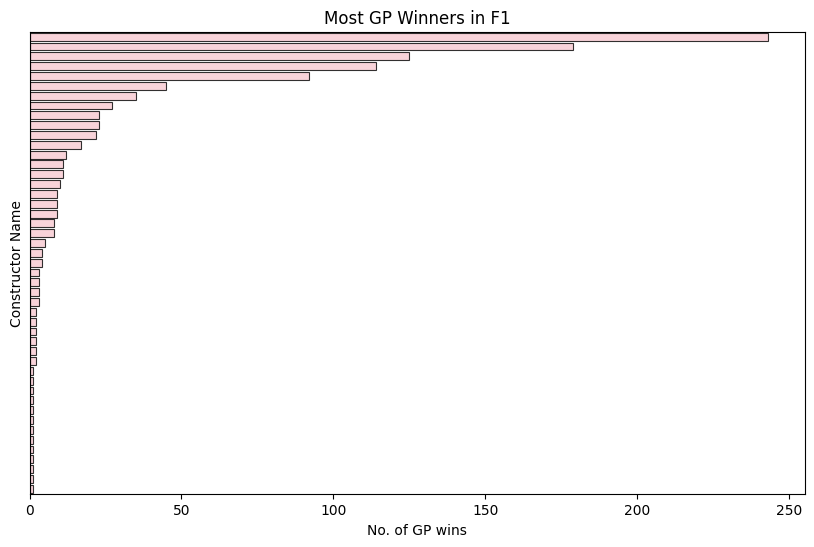

In [ ]:
sb.barplot(data=constructor_winner, y='constructor_name',x='positionOrder', color='pink', alpha=0.8, linewidth=.8, edgecolor='black')
plt.title('Most GP Winners in F1')
plt.ylabel('Constructor Name')
plt.xlabel('No. of GP wins')
plt.yticks([])

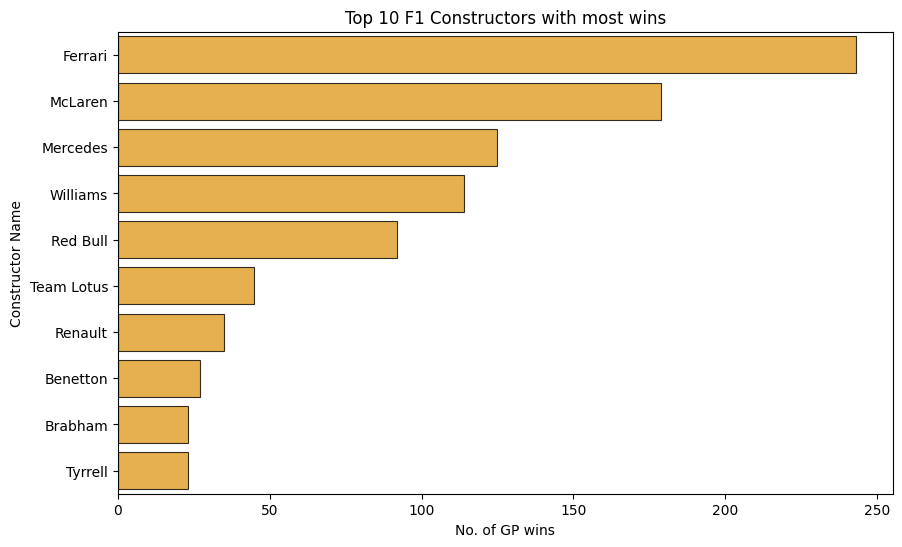

In [ ]:
#Top 10 Constructors with most Wins
sb.barplot(data=constructor_winner.head(10), y='constructor_name',x='positionOrder', color='orange', alpha=0.8, linewidth=.8, edgecolor='black')
plt.title('Top 10 F1 Constructors with most wins')
plt.ylabel('Constructor Name')
plt.xlabel('No. of GP wins');

Text(0.5, 0, 'Starting Position')

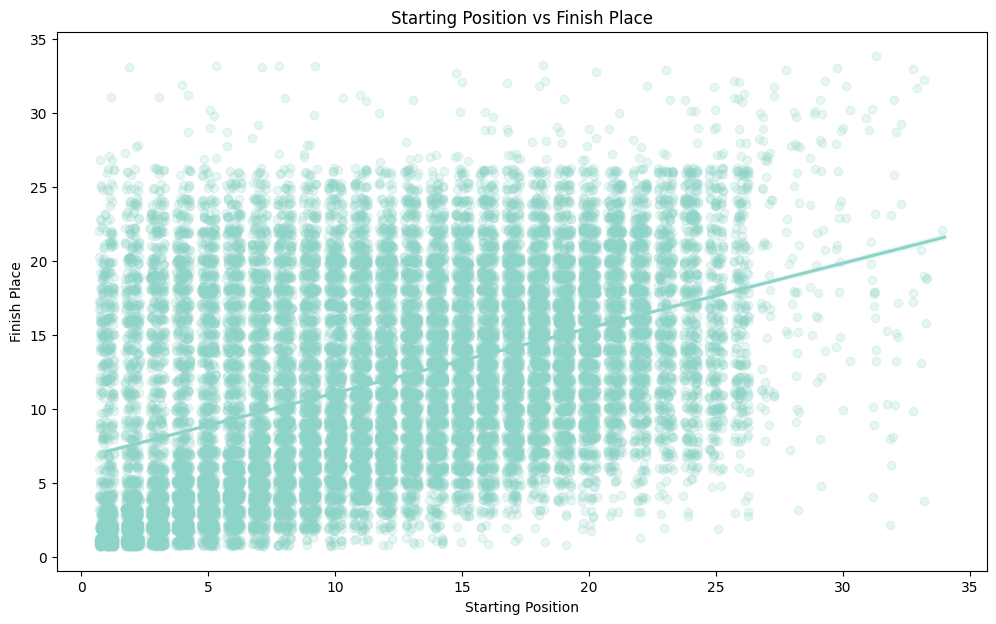

In [ ]:
df_no_zero=df[df['grid']!=0]

#create plot
plt.figure(figsize=[12,7])
sb.regplot(data=df_no_zero, x='grid', y='positionOrder', x_jitter=0.3, y_jitter=0.3, scatter_kws={'alpha':1/5});
plt.title('Starting Position vs Finish Place')
plt.ylabel('Finish Place')
plt.xlabel('Starting Position')

# **Average Fastest Speed from 2004 onwards**

In [ ]:
#create new dataset from 2004 season onwards

df_speed=df[df['year']>=2004]
df_group_speed=df_speed.groupby(['gp_name','year'])['fastestLapSpeed'].mean().to_frame().reset_index()

Text(0.5, 0.98, 'Average Speed amongst all teams during the fastest Laps at individual GPs')

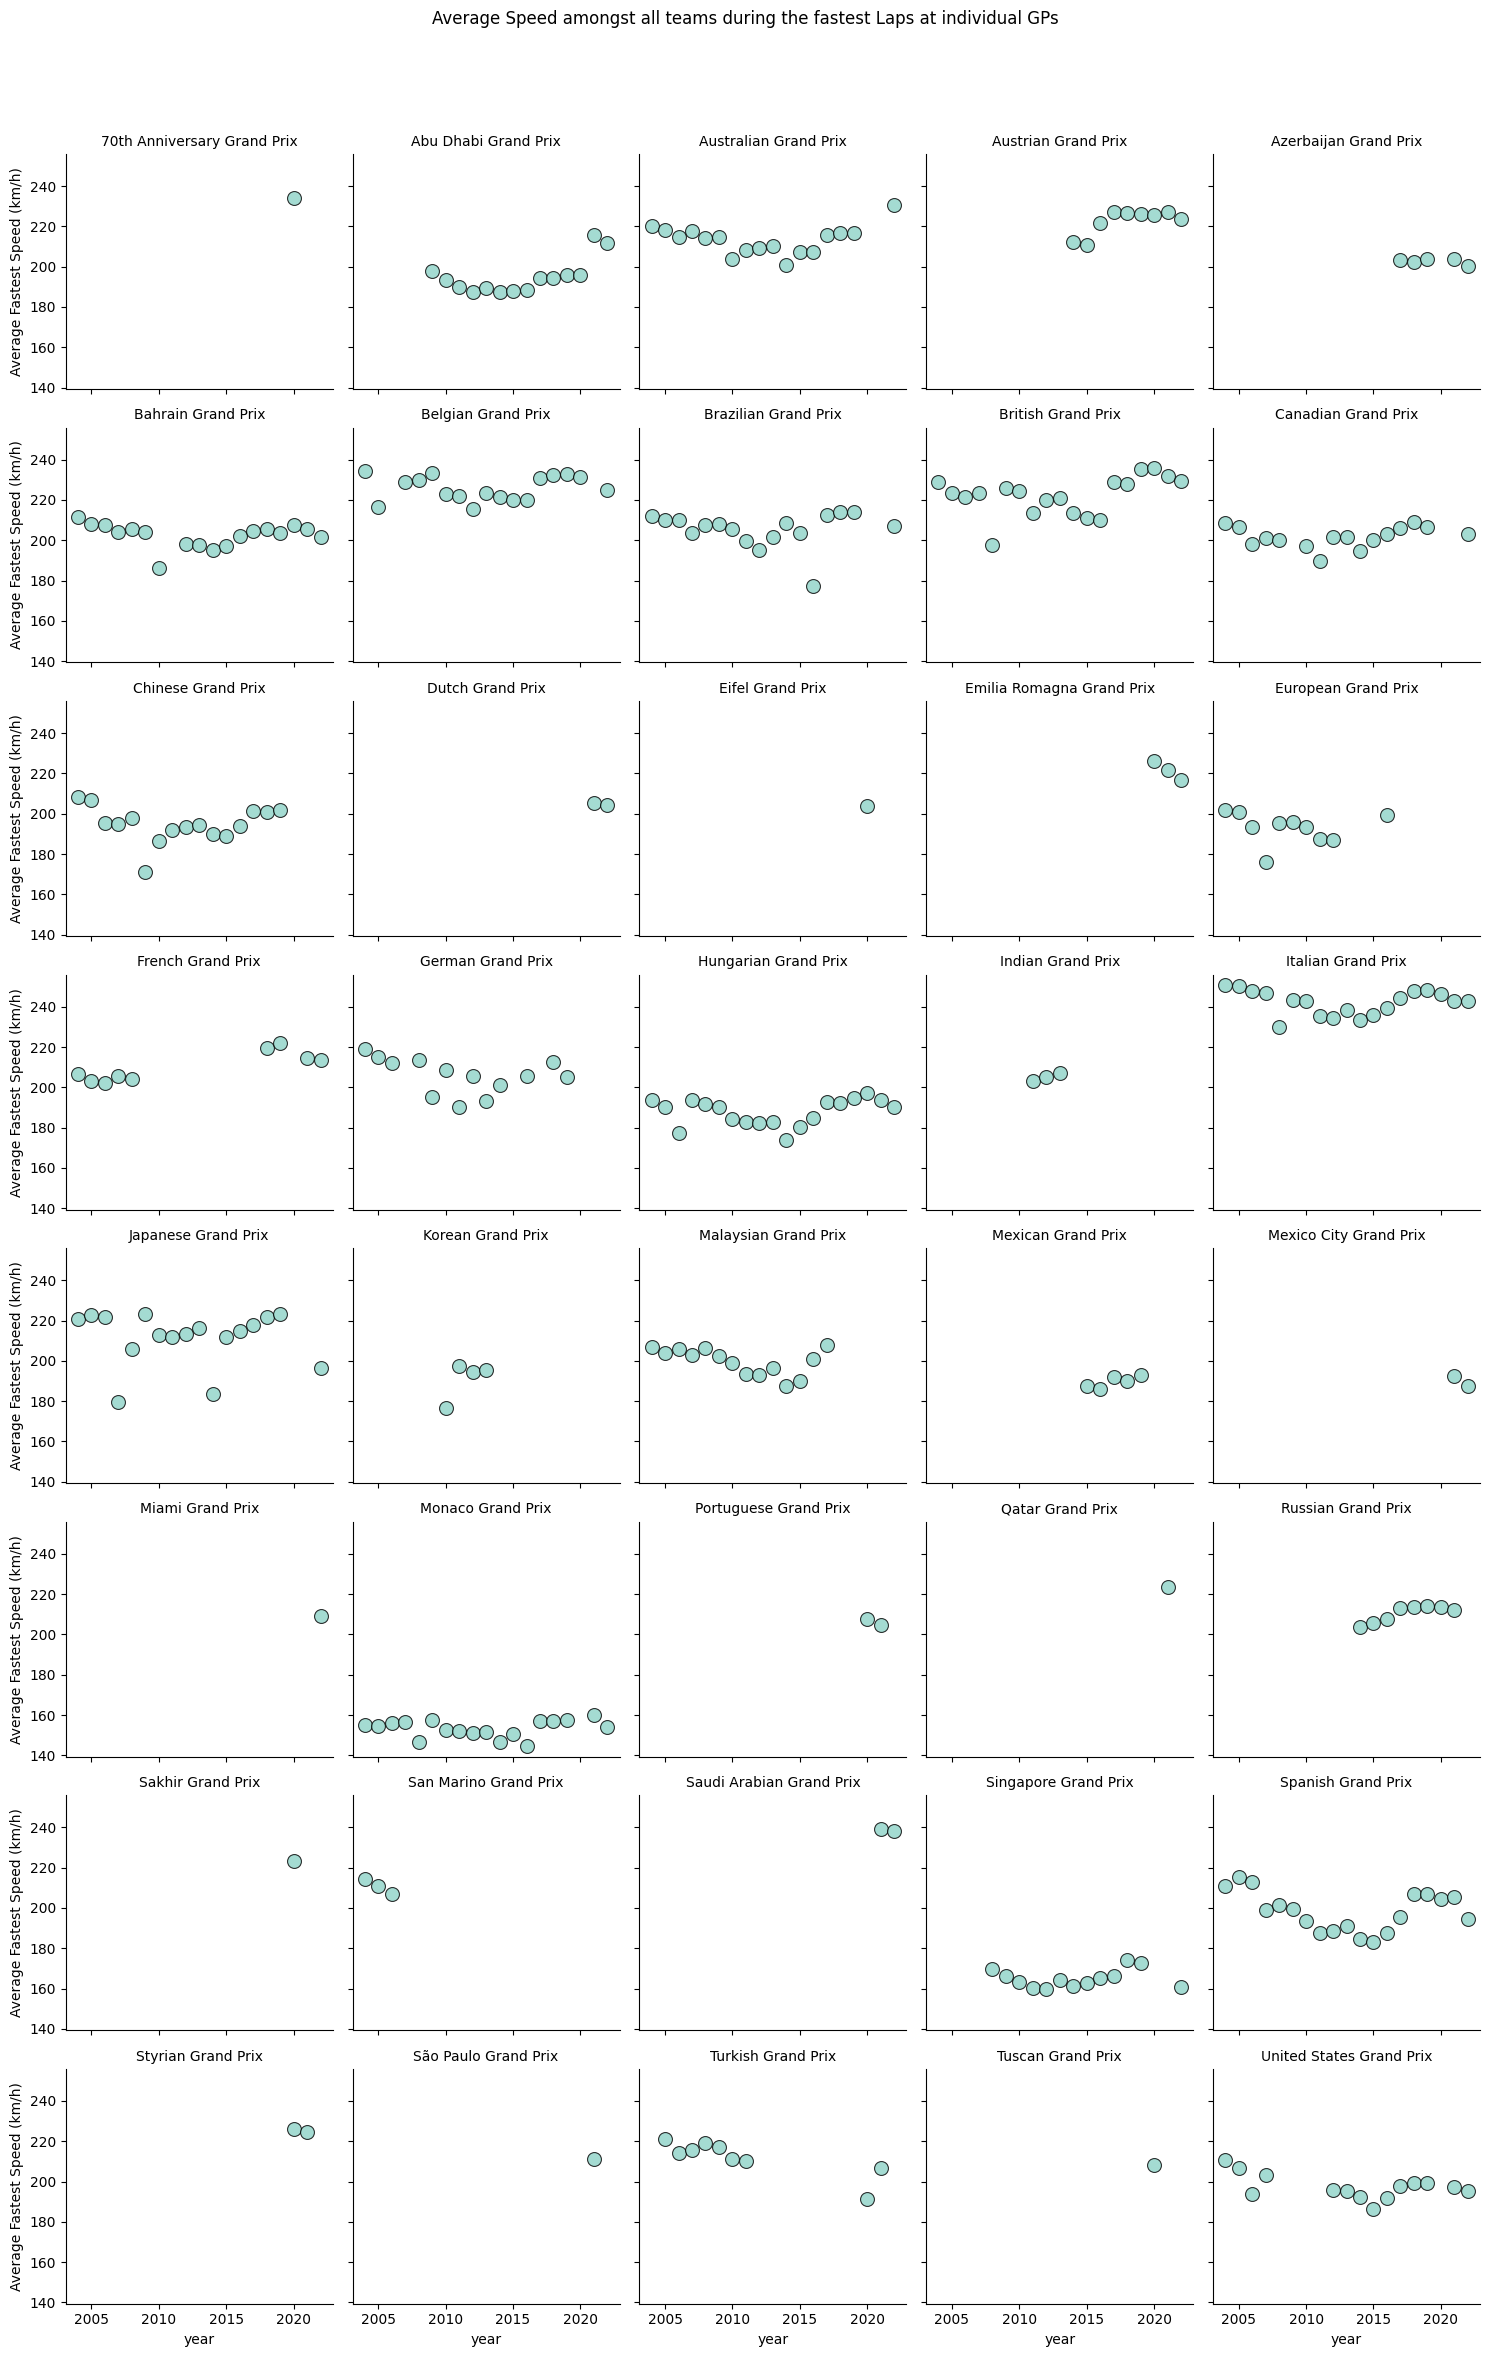

In [ ]:
# Create a facetgrid

g=sb.FacetGrid(data=df_group_speed,col='gp_name', col_wrap=5)
g.map(plt.scatter,'year', 'fastestLapSpeed', alpha=0.8, linewidth=.8, edgecolor='black', s=100)
g.set_titles("{col_name}")
g.set_xlabels('year')
g.set_ylabels('Average Fastest Speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average Speed amongst all teams during the fastest Laps at individual GPs')

 **Analysis**

From the above plots the average fastest speed from 2004 to 2015 had a substantial decrease, but after 2015 almost all the GPs has seen a increase in the average fastest speed which has again seen a decrease in the last few years which can be clearly seen from the plots of some GPs like United Sates, Singapore, Spanish, Hungarian, British and Belgian.

Monaco Grand Prix is one the slowest GP with average fastest speed around 160 km/h, followed by Singapore GP with second slowest AFS around 170-180 km/h.

# **Effect of Pole Position in winning the Race.**

In [ ]:
#P1 Q1 corrlation

p1_q1=df.loc[(df['positionOrder']==1) & (df['grid']==1)].groupby('gp_name')['positionOrder'].count().sort_values(ascending=False).to_frame().reset_index()
race_count=races[['name']].value_counts()


In [ ]:
pd1=pd.DataFrame(race_count)
pd1=pd1.reset_index()
pd1.columns=['gp_name','counts']
pd2=pd.merge(p1_q1,pd1[['gp_name','counts']],on='gp_name',how='left')
pd2['p1_q1_fraction']=pd2['positionOrder']/pd2['counts']
pd2.sort_values(by='counts',ascending=False)
pd3=pd2[pd2['counts']>=10]
pd3=pd3.drop(['positionOrder','counts'],axis='columns')
pd3=pd3.sort_values(by='p1_q1_fraction',ascending=False)
pd3

gp_name  p1_q1_fraction
19      Abu Dhabi Grand Prix        0.600000
22      Singapore Grand Prix        0.571429
20        Chinese Grand Prix        0.562500
2         Spanish Grand Prix        0.547170
0          German Grand Prix        0.500000
16     Portuguese Grand Prix        0.500000
9        Japanese Grand Prix        0.486486
18      Malaysian Grand Prix        0.473684
7        Canadian Grand Prix        0.461538
8   United States Grand Prix        0.454545
3          French Grand Prix        0.451613
17        Mexican Grand Prix        0.450000
1          Monaco Grand Prix        0.434783
13          Dutch Grand Prix        0.424242
11      Hungarian Grand Prix        0.421053
21        Bahrain Grand Prix        0.421053
12     Australian Grand Prix        0.405405
5         Belgian Grand Prix        0.397059
4         British Grand Prix        0.378378
10      Brazilian Grand Prix        0.375000
23      Argentine Grand Prix        0.350000
15     San Marino Grand Prix        0.346154
6         Italian Grand Prix        0.337838
14       Austrian Grand Prix        0.305556
24       European Grand Prix        0.304348
26  South African Grand Prix        0.260870
31          Indianapolis 500        0.181818

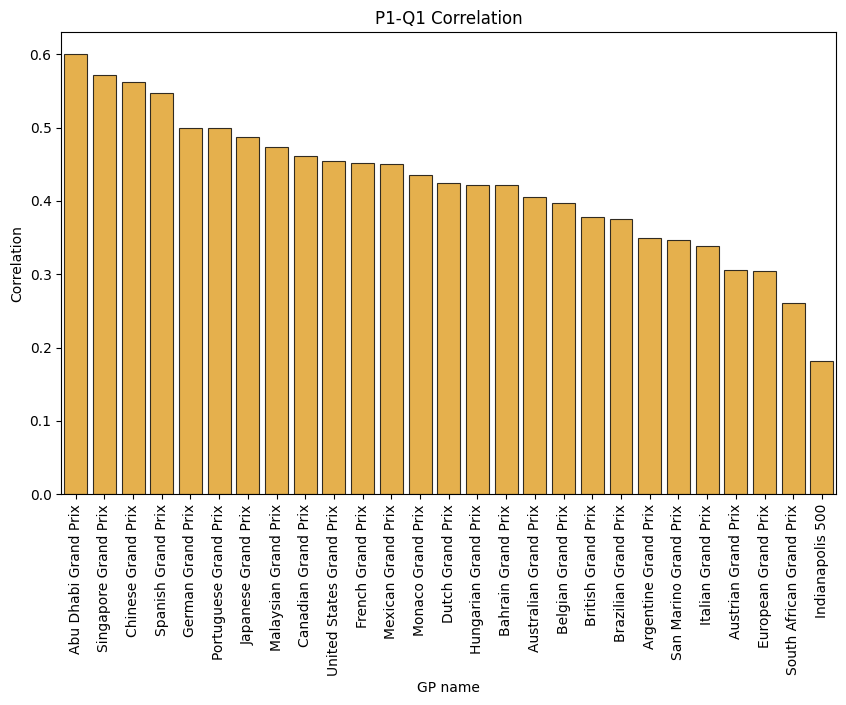

In [ ]:
sb.barplot(data=pd3, y='p1_q1_fraction',x='gp_name', color='orange', alpha=0.8, linewidth=.8, edgecolor='black')
plt.title('P1-Q1 Correlation')
plt.ylabel('Correlation')
plt.xlabel('GP name');
plt.xticks(rotation = 90)
plt.show()

# **Effect of home race in winning the race.**

In [ ]:
p1_home=pd.merge(results[['position','raceId','driverId']],races[['raceId','circuitId','name']],on='raceId',how='left')
p1_home=pd.merge(p1_home,circuits[['circuitId','location','country']],on='circuitId',how='left')
p1_home=pd.merge(p1_home,drivers[['driverId','nationality']],on='driverId',how='left')

In [ ]:
p1_home1=p1_home.loc[p1_home['position']=='1']
#p1_home1.country.unique()
x=['USA','Belgium','Brazil','Britain','France','Germany','Italy','Spain']
p1_home1=p1_home1.loc[p1_home['country'].isin(['USA','Belgium','Brazil','Britain','France','Germany','Italy','Spain'])]
p1_home1=p1_home1.loc[((p1_home1['country']=='Spain') & (p1_home1['nationality']=='Spanish')) |
                      ((p1_home1['country']=='USA') & (p1_home1['nationality']=='American')) |
                      ((p1_home1['country']=='Belgium') & (p1_home1['nationality']=='Belgian')) |
                      ((p1_home1['country']=='Brazil') & (p1_home1['nationality']=='Brazilian')) |
                      ((p1_home1['country']=='France') & (p1_home1['nationality']=='French')) |
                      ((p1_home1['country']=='Germany') & (p1_home1['nationality']=='German')) |
                      ((p1_home1['country']=='Italy') & (p1_home1['nationality']=='Italian')) |
                      ((p1_home1['country']=='Germany') & (p1_home1['nationality']=='German'))]
p1_home1.reset_index().head()

index position  raceId  driverId  circuitId                  name  \
0    348        1      35        13         18  Brazilian Grand Prix   
1    830        1      57        30         20   European Grand Prix   
2    852        1      58         4          4    Spanish Grand Prix   
3    984        1      64        30         10     German Grand Prix   
4   1116        1      70        13         18  Brazilian Grand Prix   

     location  country nationality  
0   São Paulo   Brazil   Brazilian  
1     Nürburg  Germany      German  
2    Montmeló    Spain     Spanish  
3  Hockenheim  Germany      German  
4   São Paulo   Brazil   Brazilian

In [ ]:
p1_count=p1_home1[['nationality']].value_counts()
p1_home2=pd.DataFrame(p1_count)
p1_home2=p1_home2.reset_index()
p1_home2.columns=['nationality','home_win']

p1_home3=p1_home[p1_home['position']=='1'].groupby('nationality').count().drop(['raceId','driverId','circuitId','name','location','country'], axis='columns')
p1_home3=pd.merge(p1_home3,p1_home2,on='nationality',how='left').dropna(axis=0)
p1_home3.columns=['nationality','total_win','home_win']
p1_home3['home_win_perc']=(p1_home3['home_win']/p1_home3['total_win'])*100
p1_home3=p1_home3.reset_index().drop(['index','total_win','home_win'],axis=1).sort_values(by='home_win_perc',ascending=False)

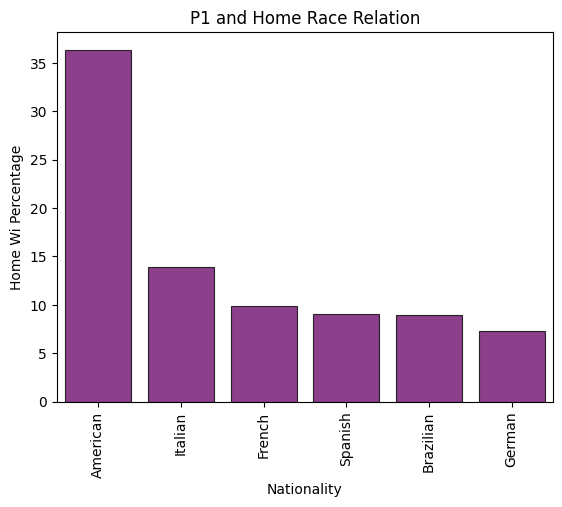

In [ ]:
sb.barplot(data=p1_home3, y='home_win_perc',x='nationality', color='purple', alpha=0.8, linewidth=.8, edgecolor='black')
plt.title('P1 and Home Race Relation')
plt.ylabel('Home Wi Percentage')
plt.xlabel('Nationality');
plt.xticks(rotation = 90)
plt.show()

# **DNF percentage by drivers and constructors**

In [ ]:
d1 = pd.merge(races,results,how='inner',on=['raceId'])
d2 = pd.merge(d1,qualifying,how='inner',on=['raceId','driverId','constructorId'])
d3 = pd.merge(d2,drivers,how='inner',on=['driverId'])
d4 = pd.merge(d3,constructors,how='inner',on=['constructorId'])
d5 = pd.merge(d4,circuits,how='inner',on=['circuitId'])

<ipython-input-70-9341ef66ca44>:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  d5 = pd.merge(d4,circuits,how='inner',on=['circuitId'])


In [ ]:
#drop the columns which are not important
data = d5.drop(['round','circuitId','time_x','url_x','resultId','driverId',
                 'constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','time_y','rank',
                 'fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef',
                 'location','lat','lng','alt','number_y','points','constructorRef','name_x','raceId','fastestLap','q2','q3','milliseconds','q1'],1)

<ipython-input-71-8d37d62146f2>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = d5.drop(['round','circuitId','time_x','url_x','resultId','driverId',


In [ ]:
#considering data points from 2010
data = data[data['year']>=2010]

In [ ]:
df.positionText.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', 'R', 'D', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', 'N',
       'W', 'F', 'E', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33'], dtype=object)

In [ ]:
data.rename(columns={'name':'GP_name','position_y':'position','grid':'quali_pos','name_y':'constructor','nationality_x':'driver_nationality','nationality_y':'constructor_nationality'},inplace=True)
data['driver'] = data['forename']+' '+data['surname']
data['date'] = pd.to_datetime(data['date'])
data['dob'] = pd.to_datetime(data['dob'])

In [ ]:
#Some of the constructors changed their name over the year so replacing old names with current name
data['constructor'] = data['constructor'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'Renault' if x=='Lotus F1' else x)
data['constructor'] = data['constructor'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)

In [ ]:
#reasons for DNF(did not finish)
data['driver_dnf'] = data['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
data['constructor_dnf'] = data['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)
data.drop(['forename','surname'],1,inplace=True)

<ipython-input-75-25c0911fc15d>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data.drop(['forename','surname'],1,inplace=True)


<ipython-input-76-f0edb6957176>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dnf_by_driver = data.groupby('driver').sum()['driver_dnf']


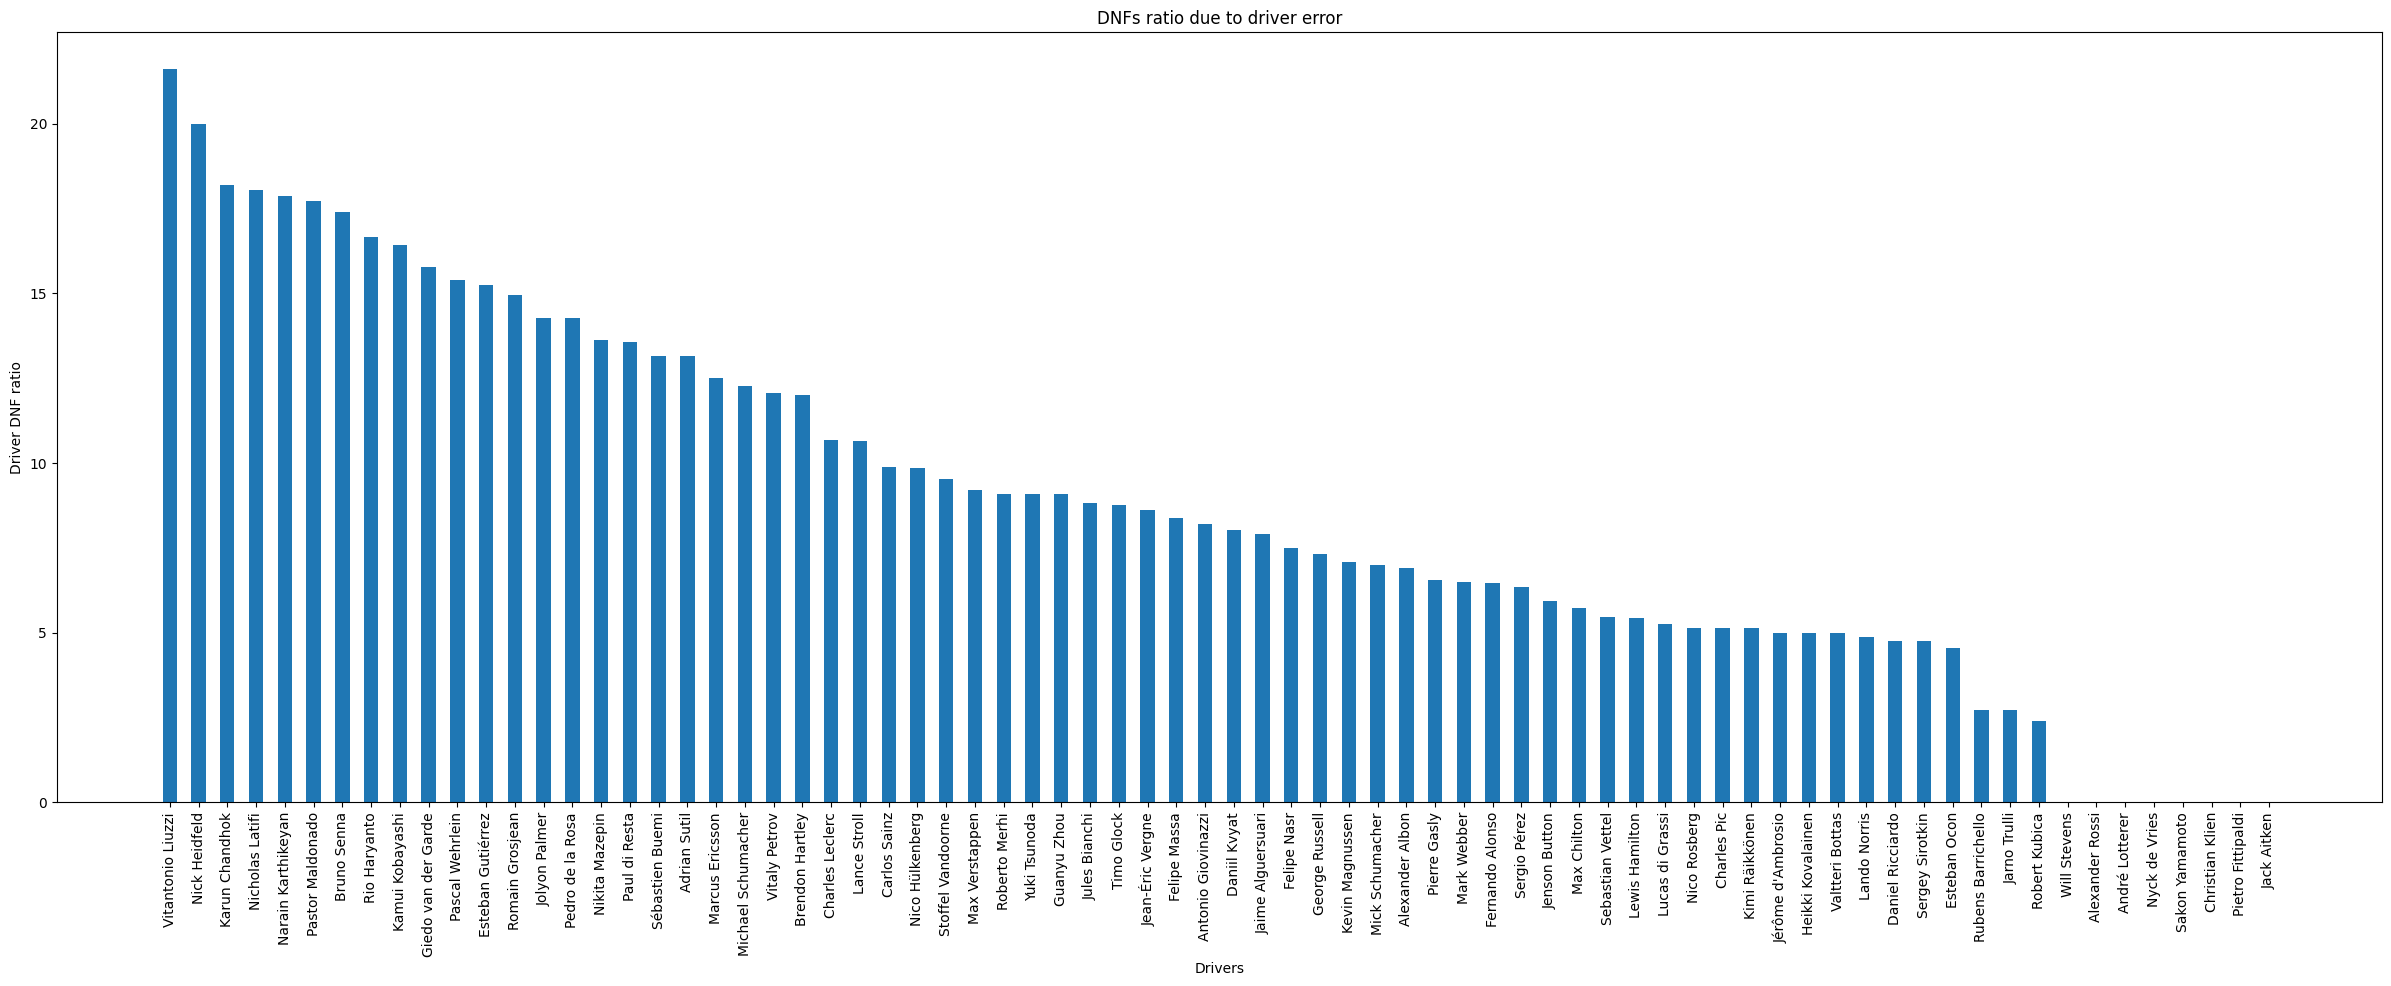

In [ ]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver*100/driver_race_entered).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Driver DNF ratio')
plt.title('DNFs ratio due to driver error')
# for bar in bars.patches:
#     yval = bar.get_height()
#     plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}',fontdict=font)
plt.show()

<ipython-input-77-02029e6be5b6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']


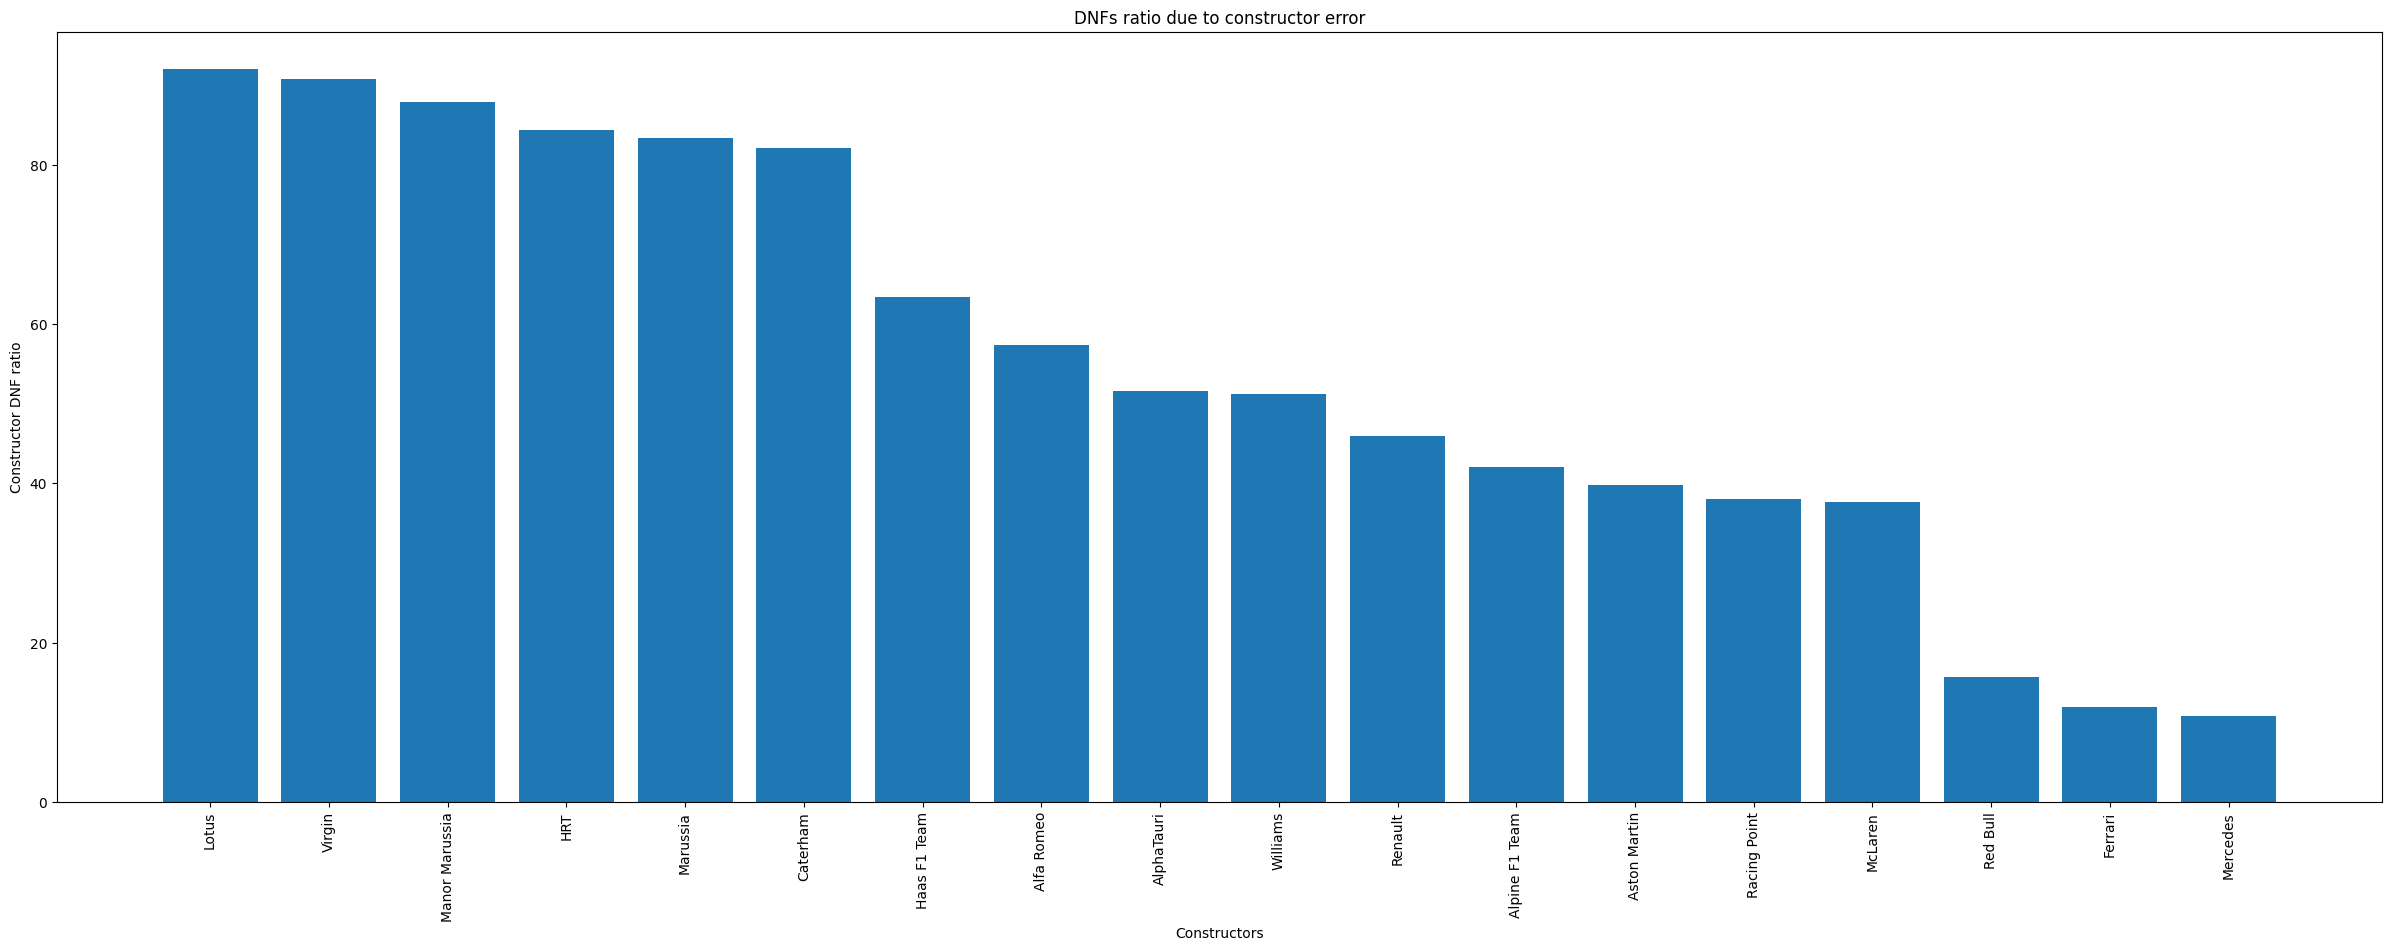

In [ ]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor*100/constructor_race_entered).sort_values(ascending=False)
plt.figure(figsize=(30,10))
bars = plt.bar(x=constructor_dnf_ratio.index,height=constructor_dnf_ratio,align='center',width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Constructors')
plt.ylabel('Constructor DNF ratio')
plt.title('DNFs ratio due to constructor error')
# for bar in bars.patches:
#     yval = bar.get_height()
#     plt.text(bar.get_x()+0.21,yval+1,f'{round(yval,2)}',fontdict=font)
plt.show()

In [ ]:
from google.colab import files
files.upload()

Saving pit_stops.csv to pit_stops.csv


{'pit_stops.csv': b'raceId,driverId,stop,lap,time,duration,milliseconds\n841,153,1,1,"17:05:23","26.898",26898\n841,30,1,1,"17:05:52","25.021",25021\n841,17,1,11,"17:20:48","23.426",23426\n841,4,1,12,"17:22:34","23.251",23251\n841,13,1,13,"17:24:10","23.842",23842\n841,22,1,13,"17:24:29","23.643",23643\n841,20,1,14,"17:25:17","22.603",22603\n841,814,1,14,"17:26:03","24.863",24863\n841,816,1,14,"17:26:50","25.259",25259\n841,67,1,15,"17:27:34","25.342",25342\n841,2,1,15,"17:27:41","22.994",22994\n841,1,1,16,"17:28:24","23.227",23227\n841,808,1,16,"17:28:39","24.535",24535\n841,3,1,16,"17:29:00","23.716",23716\n841,155,1,16,"17:29:06","24.064",24064\n841,16,1,16,"17:29:08","25.978",25978\n841,15,1,16,"17:29:49","24.899",24899\n841,18,1,17,"17:30:24","16.867",16867\n841,153,2,17,"17:31:06","24.463",24463\n841,5,1,17,"17:31:11","24.865",24865\n841,30,2,17,"17:32:08","23.988",23988\n841,10,1,18,"17:33:02","23.792",23792\n841,18,2,19,"17:33:53","23.303",23303\n841,815,1,23,"17:40:27","23.438

In [ ]:
pit_stop=pd.read_csv('pit_stops.csv')
pit_stop.head()

raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251
4     841        13     1   13  17:24:10   23.842         23842

In [ ]:
pit_df=pd.merge(pit_stop,races[['year','raceId']], on=['raceId'],how='inner')


In [ ]:
pit_df.loc[pit_df['year']==2022]

raceId  driverId  stop  lap      time duration  milliseconds  year
8829    1074         1     1   11  18:21:54   25.201         25201  2022
8830    1074         4     1   11  18:22:10   25.365         25365  2022
8831    1074       854     1   12  18:24:08   25.214         25214  2022
8832    1074       848     1   13  18:25:47   24.874         24874  2022
8833    1074       830     1   14  18:26:43   24.897         24897  2022
...      ...       ...   ...  ...       ...      ...           ...   ...
9629    1096       849     2   38  18:02:50   25.174         25174  2022
9630    1096       840     2   40  18:04:44   21.802         21802  2022
9631    1096       839     2   41  18:06:09   21.734         21734  2022
9632    1096       846     2   42  18:07:36   21.559         21559  2022
9633    1096       855     2   44  18:11:10   23.159         23159  2022

[805 rows x 8 columns]

In [ ]:
pit_df.groupby('year')['milliseconds'].mean()

year
2011     24448.849192
2012     23283.769556
2013     24121.318612
2014     55088.632353
2015     25500.213225
2016    124357.194135
2017     56789.619597
2018     24674.283582
2019     24938.538462
2020    160940.321549
2021    219750.268170
2022    122574.485714
Name: milliseconds, dtype: float64

In [ ]:
dnf_by_driver = data.groupby('driver').sum()['driver_dnf']
driver_race_entered = data.groupby('driver').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver/driver_race_entered)
driver_confidence = 1-driver_dnf_ratio
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))

<ipython-input-78-7039cdcc8b4a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dnf_by_driver = data.groupby('driver').sum()['driver_dnf']


In [ ]:
dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']
constructor_race_entered = data.groupby('constructor').count()['constructor_dnf']
constructor_dnf_ratio = (dnf_by_constructor/constructor_race_entered)
constructor_relaiblity = 1-constructor_dnf_ratio
constructor_relaiblity_dict = dict(zip(constructor_relaiblity.index,constructor_relaiblity))

<ipython-input-79-f939a3081a60>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dnf_by_constructor = data.groupby('constructor').sum()['constructor_dnf']


In [ ]:
data['driver_confidence'] = data['driver'].apply(lambda x:driver_confidence_dict[x])
data['constructor_relaiblity'] = data['constructor'].apply(lambda x:constructor_relaiblity_dict[x])
#removing retired drivers and constructors
active_constructors = ['Renault', 'Williams', 'McLaren', 'Ferrari', 'Mercedes',
                       'AlphaTauri', 'Racing Point', 'Alfa Romeo', 'Red Bull',
                       'Haas F1 Team']
active_drivers = ['Daniel Ricciardo', 'Kevin Magnussen', 'Carlos Sainz',
                  'Valtteri Bottas', 'Lance Stroll', 'George Russell',
                  'Lando Norris', 'Sebastian Vettel', 'Kimi Räikkönen',
                  'Charles Leclerc', 'Lewis Hamilton', 'Daniil Kvyat',
                  'Max Verstappen', 'Pierre Gasly', 'Alexander Albon',
                  'Sergio Pérez', 'Esteban Ocon', 'Antonio Giovinazzi',
                  'Romain Grosjean','Nicholas Latifi']
data['active_driver'] = data['driver'].apply(lambda x: int(x in active_drivers))
data['active_constructor'] = data['constructor'].apply(lambda x: int(x in active_constructors))

# **Hamilton vs Verstappen in 2021**

In [ ]:
df=pd.merge(df,races[['date','raceId']],on='raceId',how='left')
df

In [ ]:
df['name_x']

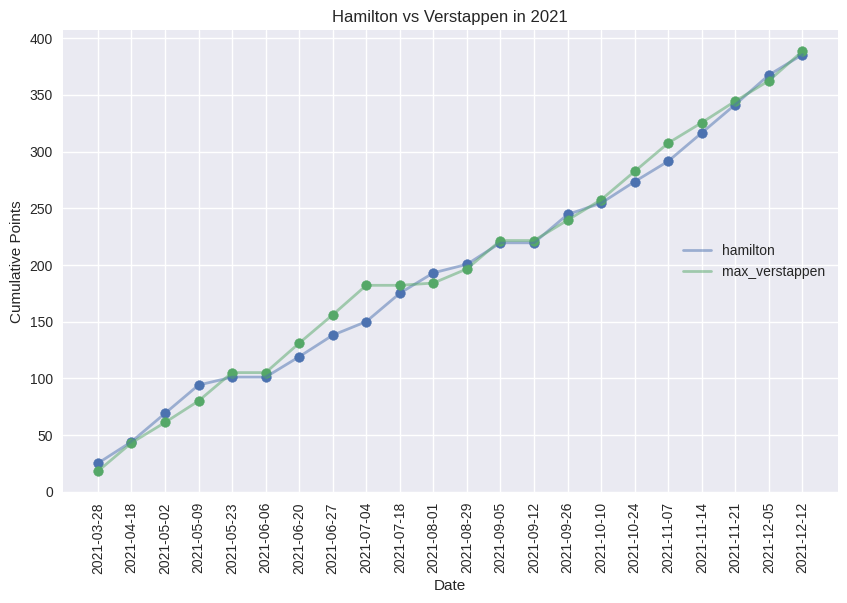

In [ ]:
y2021 = df[(df['driverRef'] == 'hamilton') | (df['driverRef'] == 'max_verstappen')]
y2021 = y2021[y2021['year'] == 2021]
y2021 = y2021[['date','driverRef', 'points']]
y2021['winRace'] = y2021['points'].apply(lambda x: 'yes' if x == 25 else 'no')
y2021['current'] = y2021.groupby('driverRef')['points'].cumsum()
plt.figure(figsize=(10, 6))

for driver in ['hamilton', 'max_verstappen']:
    driver_data = y2021[y2021['driverRef'] == driver]
    plt.plot(driver_data['date'],driver_data['current'], label=driver, linewidth=2, alpha=0.5)
    plt.scatter(driver_data['date'], driver_data['current']) #c=driver_data['driverRef'], cmap='Set1', edgecolor='black', s=50)
    plt.xticks(rotation=90)
plt.title('Hamilton vs Verstappen in 2021')
plt.xlabel("Date")
plt.ylabel("Cumulative Points")
plt.legend(loc='right')


# **Model considering both drivers and constructors**

In [ ]:
cleaned_data = data[['GP_name','quali_pos','constructor','driver','position','driver_confidence','constructor_relaiblity','active_driver','active_constructor','dob']]
cleaned_data = cleaned_data[(cleaned_data['active_driver']==1)&(cleaned_data['active_constructor']==1)]
cleaned_data.to_csv('cleaned_data.csv',index=False)

In [ ]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2

In [ ]:
sc  = StandardScaler()
le = LabelEncoder()
x=cleaned_data
x['GP_name'] = le.fit_transform(x['GP_name'])
x['constructor'] = le.fit_transform(x['constructor'])
x['driver'] = le.fit_transform(x['driver'])
x['GP_name'] = le.fit_transform(x['GP_name'])
X = x.drop(['position','active_driver','active_constructor','dob'],1)
y = x['position'].apply(lambda x: position_index(x))

<ipython-input-147-f051af59b6a8>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = x.drop(['position','active_driver','active_constructor','dob'],1)


In [ ]:
X

GP_name  quali_pos  constructor  driver  driver_confidence  \
39          0         12            8       4           0.952381   
40          0         14            8       8           0.929078   
41          0          9            8       2           0.901235   
90          0         16            9      19           0.950249   
91          0         15            9      19           0.950249   
...       ...        ...          ...     ...                ...   
9555       22         11            7      18           0.936441   
9556       22          7            7      13           0.907975   
9559       22         16            0       9           0.948718   
9560       22         18            0       1           0.918033   
9563       22          2            1      15           0.934579   

      constructor_relaiblity  
39                  0.539906  
40                  0.539906  
41                  0.539906  
90                  0.487427  
91                  0.487427  
...                      ...  
9555                0.843023  
9556                0.843023  
9559                0.426070  
9560                0.426070  
9563                0.483495  

[2766 rows x 6 columns]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=None)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression : 0.8991288651703029
DecisionTreeClassifier : 0.8915410976822058
RandomForestClassifier : 0.9215468529273269
SVC : 0.9190066970125047
GaussianNB : 0.792123162245592
KNeighborsClassifier : 0.8832129963898916


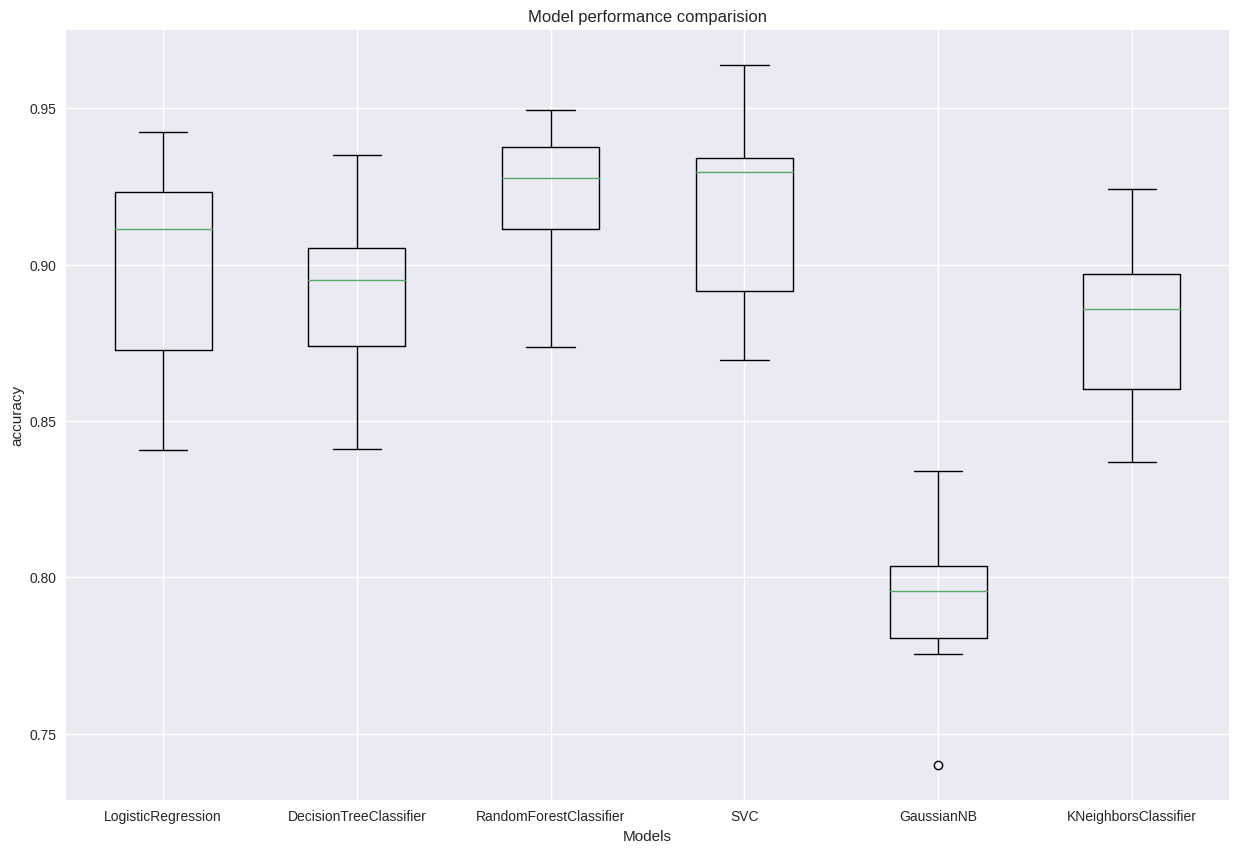

In [ ]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance comparision')
plt.show()


# **Model considering only drivers**

In [ ]:
#creating a driver age parameter
data['age_at_gp_in_days'] = abs(data['dob']-data['date'])
data['age_at_gp_in_days'] = data['age_at_gp_in_days'].apply(lambda x: str(x).split(' ')[0])

In [ ]:
x_d= data[['GP_name','quali_pos','driver','age_at_gp_in_days','position','driver_confidence','active_driver']]

In [ ]:
x_d = x_d[x_d['active_driver']==1]

In [ ]:
sc  = StandardScaler()
le = LabelEncoder()
x_d['GP_name'] = le.fit_transform(x_d['GP_name'])
x_d['driver'] = le.fit_transform(x_d['driver'])
x_d['GP_name'] = le.fit_transform(x_d['GP_name'])
x_d['age_at_gp_in_days'] = sc.fit_transform(x_d[['age_at_gp_in_days']])
X_d = x_d.drop(['position','active_driver'],1)
y_d = x_d['position'].apply(lambda x: position_index(x))

<ipython-input-160-c31483ee1796>:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_d = x_d.drop(['position','active_driver'],1)


In [ ]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=None)
    result = cross_val_score(model,X_d,y_d,cv=cv,scoring='accuracy')
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression : 0.920391423057007
DecisionTreeClassifier : 0.8836922751023867
RandomForestClassifier : 0.9293108318034177
SVC : 0.920046603587064
GaussianNB : 0.8339511839194087
KNeighborsClassifier : 0.8946794238101964


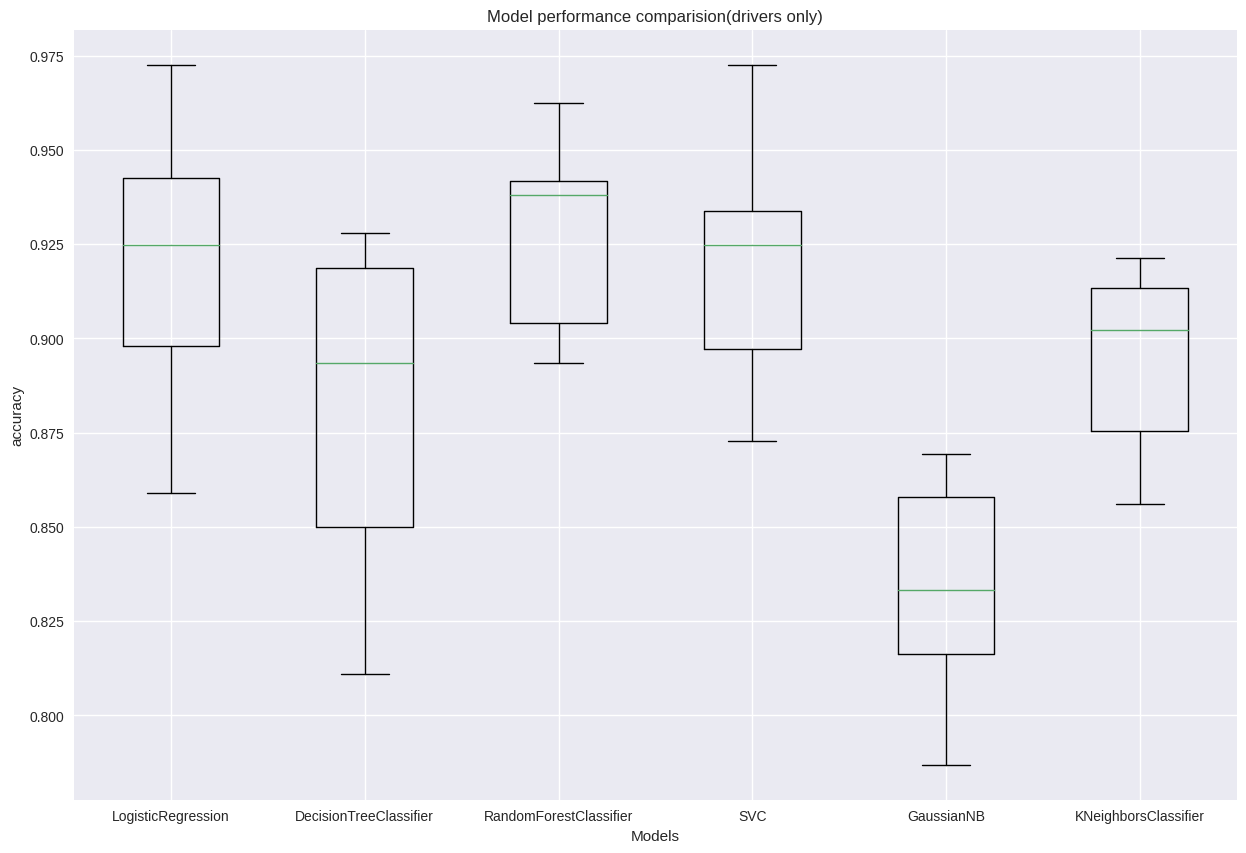

In [ ]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_dri,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance comparision(drivers only)')
plt.show()

# **Model considering only constructor**

In [ ]:
x_c = data[['GP_name','quali_pos','constructor','position','constructor_relaiblity','active_constructor']]

In [ ]:
x_c = x_c[x_c['active_constructor']==1]

In [ ]:
x_c = x_c[x_c['active_constructor']==1]
sc  = StandardScaler()
le = LabelEncoder()
x_c['GP_name'] = le.fit_transform(x_c['GP_name'])
x_c['constructor'] = le.fit_transform(x_c['constructor'])
X_c = x_c.drop(['position','active_constructor'],1)
y_c = x_c['position'].apply(lambda x: position_index(x))

<ipython-input-168-c096b5bce19d>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_c = x_c.drop(['position','active_constructor'],1)


In [ ]:
#cross validation for diffrent models
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_const = []
results_const = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=10,random_state=None)
    result = cross_val_score(model,X_c,y_c,cv=cv,scoring='accuracy')
    mean_results_const.append(result.mean())
    results_const.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression : 0.9257355152587351
DecisionTreeClassifier : 0.912266253869969
RandomForestClassifier : 0.9282534276868641
SVC : 0.9448708536045997
GaussianNB : 0.8432870411322424
KNeighborsClassifier : 0.9177363998230872


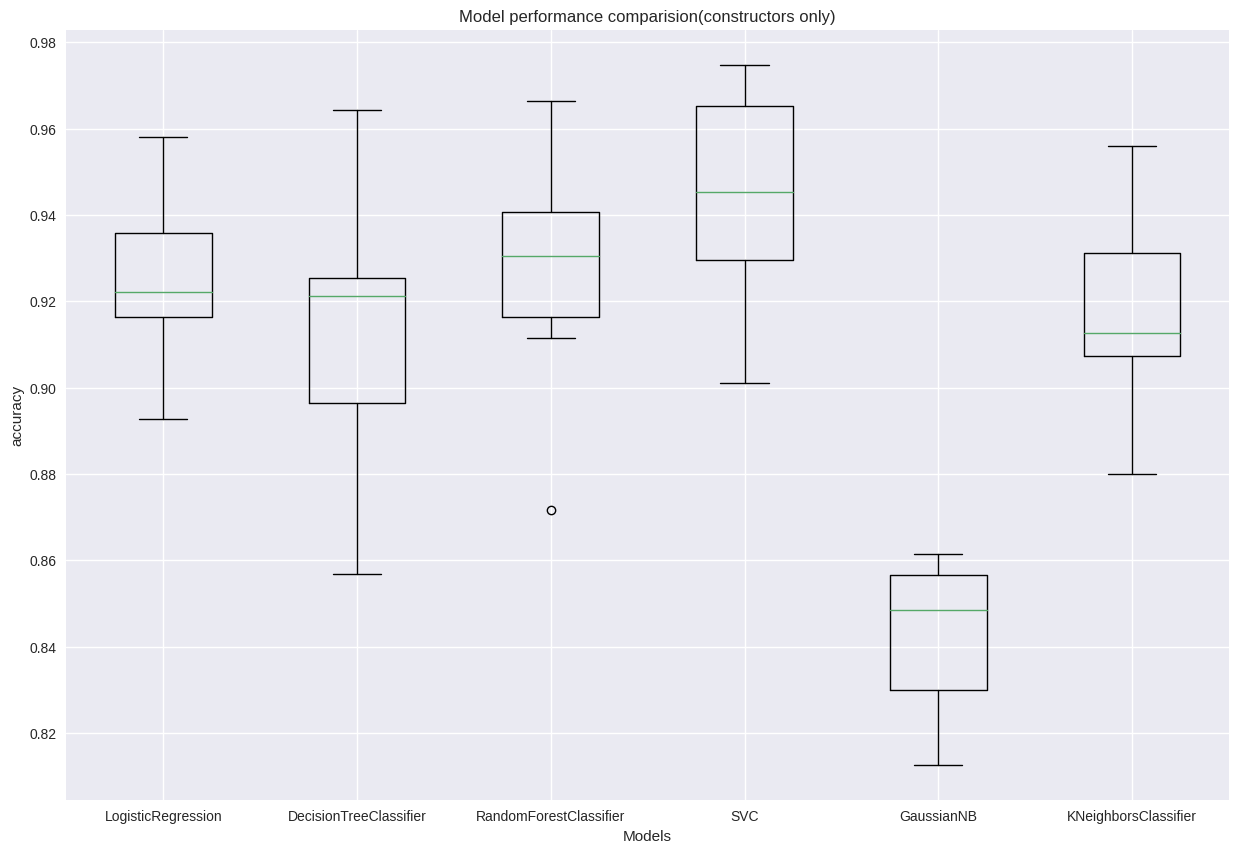

In [ ]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_const,labels=name)
plt.xlabel('Models')
plt.ylabel('accuracy')
plt.title('Model performance comparision(constructors only)')
plt.show()

# **Mean score of our three assumptions**

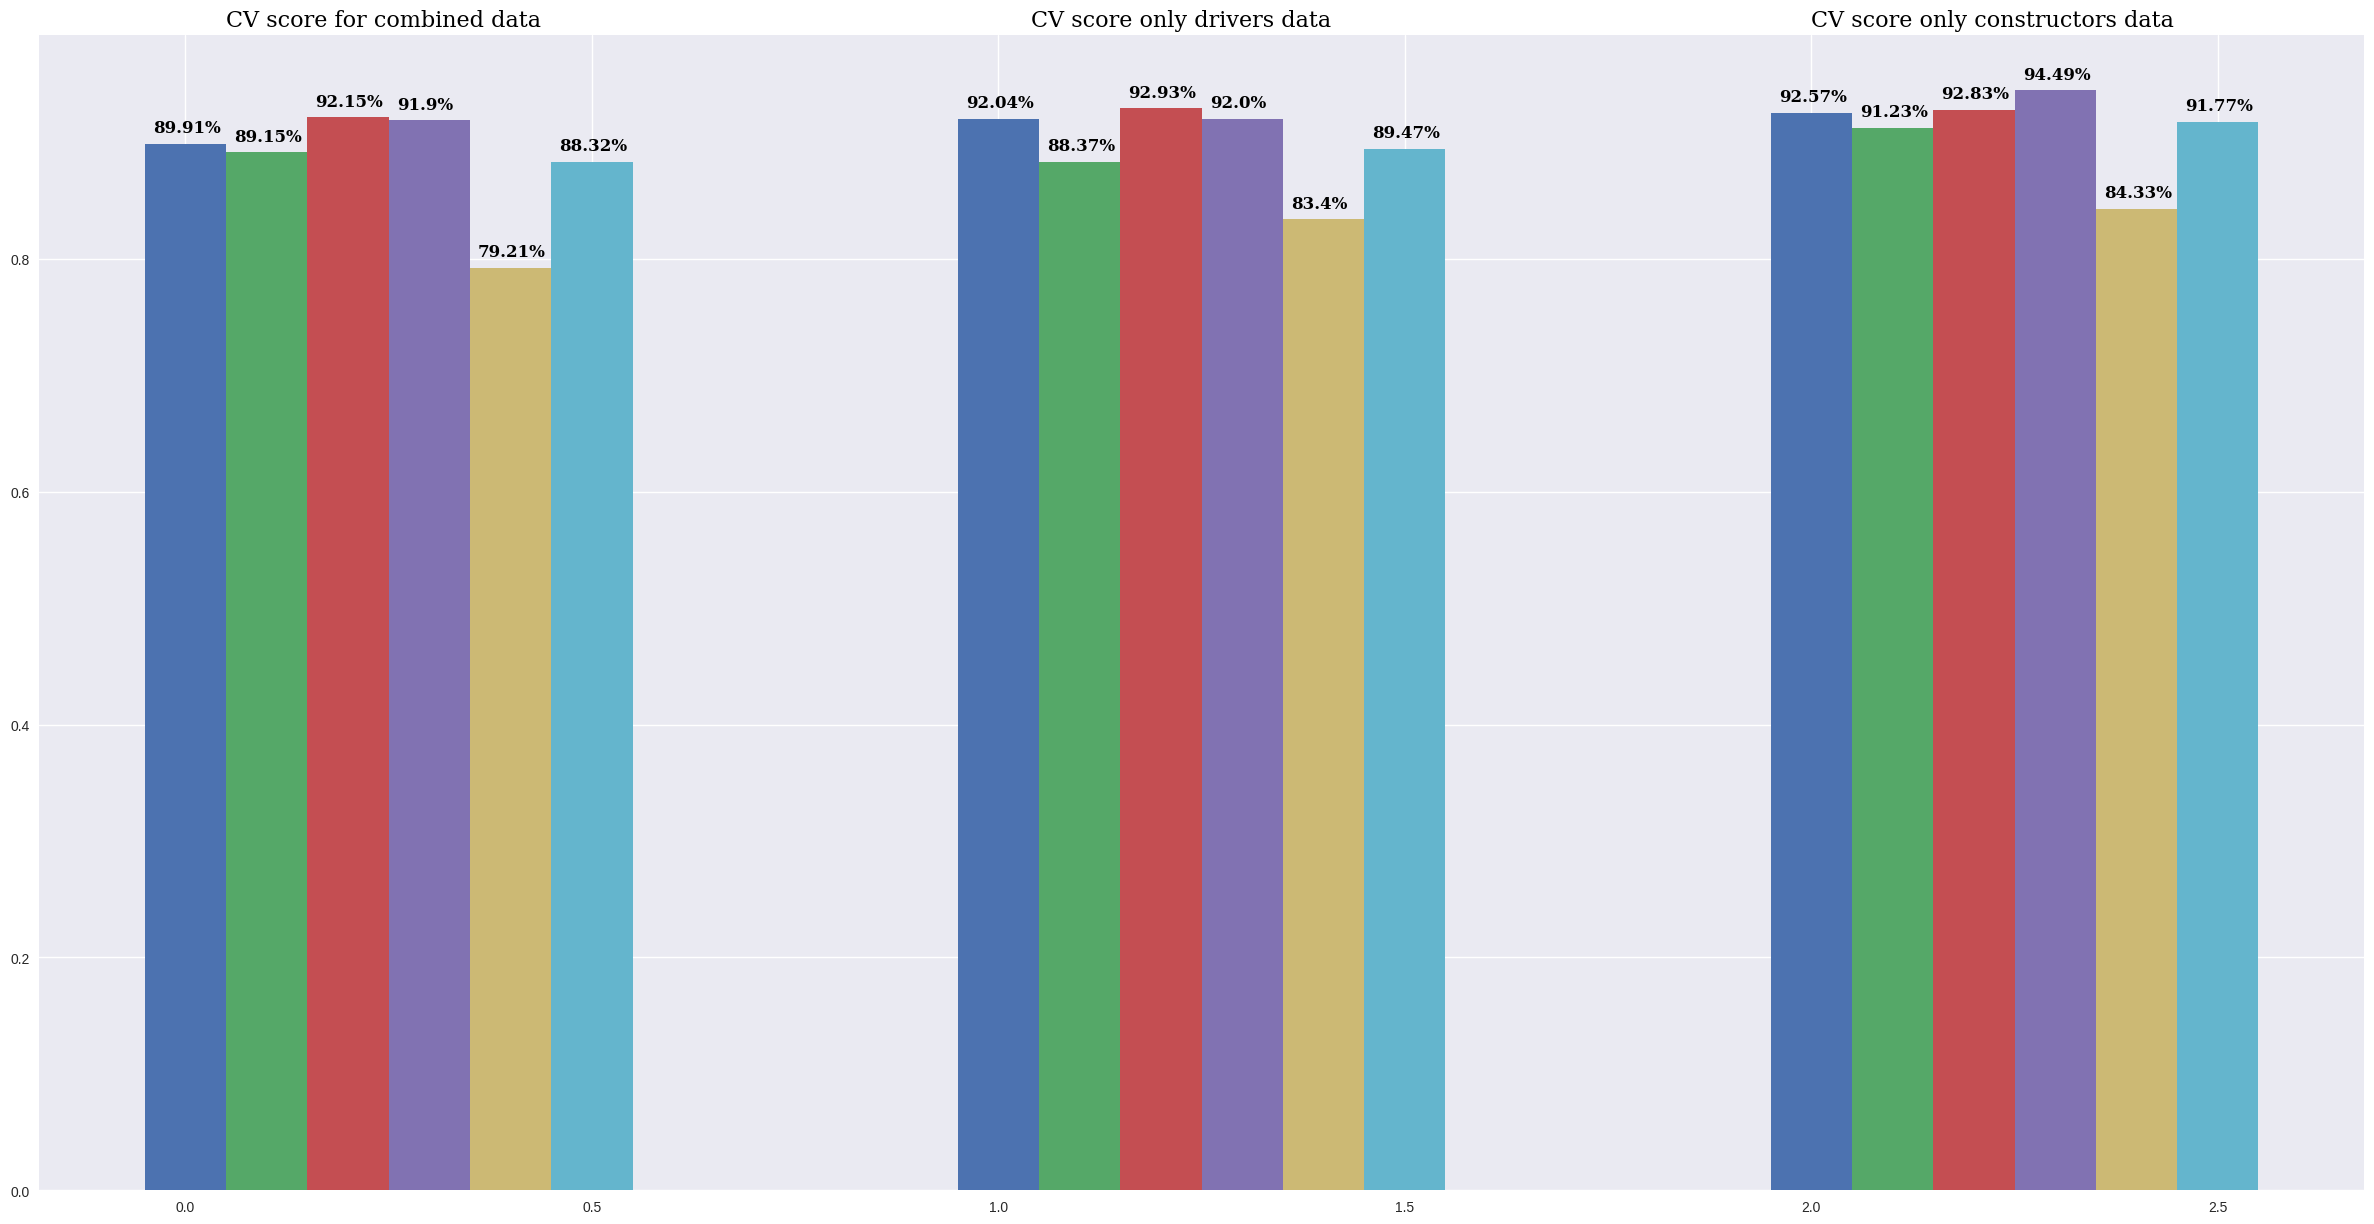

In [ ]:
lr = [mean_results[0],mean_results_dri[0],mean_results_const[0]]
dtc = [mean_results[1],mean_results_dri[1],mean_results_const[1]]
rfc = [mean_results[2],mean_results_dri[2],mean_results_const[2]]
svc = [mean_results[3],mean_results_dri[3],mean_results_const[3]]
gnb = [mean_results[4],mean_results_dri[4],mean_results_const[4]]
knn = [mean_results[5],mean_results_dri[5],mean_results_const[5]]
font1 = {
    'family':'serif',
    'color':'black',
    'weight':'normal',
    'size':16
}
font2 = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':12
}
x_ax = np.arange(3)
plt.figure(figsize=(30,15))
bar1 = plt.bar(x_ax,lr,width=0.1,align='center')
bar2 = plt.bar(x_ax+0.1,dtc,width=0.1,align='center')
bar3 = plt.bar(x_ax+0.2,rfc,width=0.1,align='center')
bar4 = plt.bar(x_ax+0.3,svc,width=0.1,align='center')
bar5 = plt.bar(x_ax+0.4,gnb,width=0.1,align='center')
bar6 = plt.bar(x_ax+0.5,knn,width=0.1,align='center')
plt.text(0.05,1,'CV score for combined data',fontdict=font1)
plt.text(1.04,1,'CV score only drivers data',fontdict=font1)
plt.text(2,1,'CV score only constructors data',fontdict=font1)
for bar in bar1.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar2.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar3.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar4.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar5.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
for bar in bar6.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()+0.01,yval+0.01,f'{round(yval*100,2)}%',fontdict=font2)
plt.show()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
min_samples_split = [2,5,8,10,15,20]
min_samples_leaf = [1,2,4,6,8,10]
bootstrap = [True,False]

random_parms = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
                }

In [ ]:
rf_rand = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf_rand,param_distributions=random_parms,n_iter=100,cv=10,verbose=2,n_jobs=-1)
rf_random.fit(X,y)
rf_random.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


KeyboardInterrupt: ignored

In [ ]:
rf = RandomForestClassifier(n_estimators=1600,min_samples_split=20,min_samples_leaf=1,max_features='sqrt',max_depth=90,bootstrap=True)
kf = StratifiedKFold(n_splits=10,random_state=None,shuffle=False)
for train_index,test_index in kf.split(X,y):
    X_train,X_test = X.iloc[train_index],X.iloc[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]

In [ ]:
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
cnf_mat_rf = confusion_matrix(y_test,y_pred_rf)
cnf_mat_rf = cnf_mat_rf/cnf_mat_rf.sum()

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
cnf_mat_svc = confusion_matrix(y_test,y_pred)
cnf_mat_svc = cnf_mat_svc/cnf_mat_svc.sum()

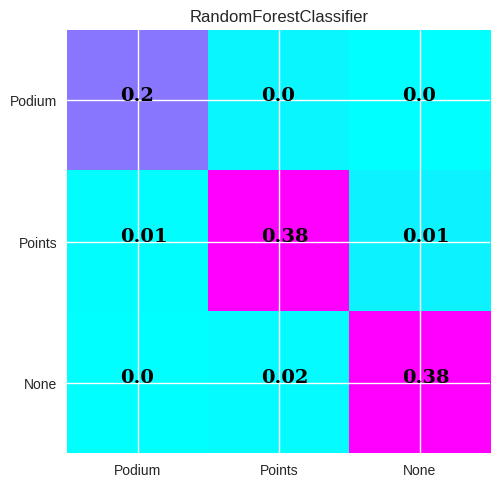

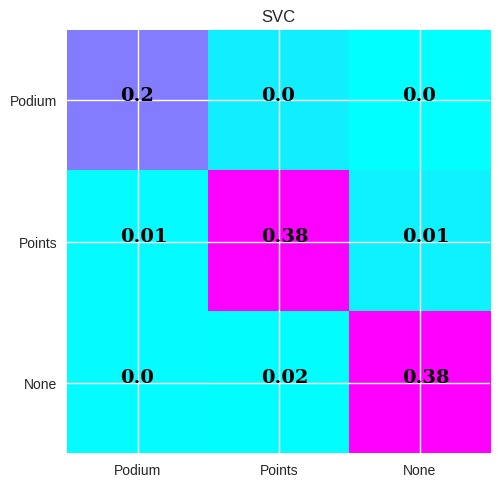

In [ ]:
font3 = {
    'family':'serif',
    'color':'black',
    'weight':'bold',
    'size':14
}
fig1,ax1 = plt.subplots()
fig2,ax2 = plt.subplots()
ax1.set_xticks(np.arange(3))
ax1.set_yticks(np.arange(3))
ax1.set_xticklabels(['Podium','Points','None'])
ax1.set_yticklabels(['Podium','Points','None'])
ax1.set_title('RandomForestClassifier')
im_rf = ax1.imshow(cnf_mat_rf,cmap='cool')
for i in range(3):
    for j in range(3):
            ax1.text(i-0.125,j,round(cnf_mat_rf[i,j],2),fontdict=font3)

ax2.set_xticks(np.arange(3))
ax2.set_yticks(np.arange(3))
ax2.set_xticklabels(['Podium','Points','None'])
ax2.set_yticklabels(['Podium','Points','None'])
ax2.set_title('SVC')
im_svc = ax2.imshow(cnf_mat_svc,cmap='cool')
for i in range(3):
    for j in range(3):
            ax2.text(i-0.125,j,round(cnf_mat_rf[i,j],2),fontdict=font3)

In [ ]:
rf_pression = precision_score(y_test, y_pred_rf, average='macro')
rf_f1 = f1_score(y_test,y_pred_rf,average='macro')
rf_recall = recall_score(y_test,y_pred_rf,average='macro')
svc_pression = precision_score(y_test, y_pred_svc, average='micro')
svc_f1 = f1_score(y_test,y_pred_svc,average='macro')
svc_recall = recall_score(y_test,y_pred_svc,average='macro')
metrics_dict ={
    'RandomForestClassifier':{'precision_score':rf_pression,'f1_score':rf_f1,'recall_score':rf_recall},
    'SVC':{'precision_score':svc_pression,'f1_score':svc_f1,'recall_score':svc_recall}
}
metrics_df = pd.DataFrame(metrics_dict)
metrics_df

RandomForestClassifier       SVC
precision_score                0.960680  0.934783
f1_score                       0.956720  0.930465
recall_score                   0.953307  0.927435